In [3]:
# 데이터셋을 불러옵니다. 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import category_encoders as ce
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')


In [4]:
df_kc_house_data = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


## 상관계수가 가장 높은 특성

In [ ]:
df.corr(method='pearson', min_periods=1)['price'].sort_values(ascending=False)

## 선형 회귀식

In [ ]:
# 다중선형회귀를 예시로 들어보겠습니다.
# 회귀계수
print('coefficient : ', simple_ols.coef_.round())

## 절편(intercept)
print('Intercept : ', simple_ols.intercept_)

## 단순선형회귀 모델을 만들기 위해 전제되어야 하는 조건들 

1) 선형성 : 선형성은 예측하고자 하는 종속변수 Y와 독립변수 X간데 선형성을 만족하는 특성입니다.

만약 선형성을 만족하지 않는다고 한다면 데이터를 변환하는 방법이 필요합니다. 그 종류에는 다음과 같이 존재합니다.

로그 변환
지수 변환
루트 변환
다중 선형회귀를 진행하고 있다면 다른 새로운 변수를 추가하거나, 선형성을 만족하지 않는 변수를 제거하는 방법도 있습니다.

2) 독립성 : 독립성이란 독립변수 X간의 상관관계가 없이 독립성을 만족하는 특성입니다.

다중공선성이라고도 불리는 다시말해 독립변수의 상관관계가 있다면 제거할 필요가 있습니다. 하지만 단순 선형회귀과 같이 변수가 1개인 경우에는 적용되지 않는 부분입니다.

3) 등분산성 : 분산이 동일하다는 의미로, 어떠한 특정한 패턴이 없이 고르게 분포해야 한다는 특성입니다. 등분산성의 주체는 잔차입니다.

잔차가 서로 상관관계가 있다면?? 추정된 회귀식으로 설명되는 않은 부분에서 다른 어떤 관계가 있다는 것을 의미하는 것으로 이는 회귀식의 설명력을 약하게 만듭니다.

4) 정규성
: 잔차가 정규성을 만족하는지에 대한 특성

잔차가 정규 분포 모양을 분포하고 있다면 좋은 선형 회귀 모델이라고 말할 수 있습니다.


# # 선형회귀 구하기

#### 상관계수 구하기

In [5]:
df = df_kc_house_data

# 구하고자 하는 목표 값 컬럼
target_col_name = 'price'

# 상관계수가 높은 컬럼 확인
lst_corr_colname = df.corr(method='pearson', min_periods=1)[target_col_name].sort_values(ascending=False)[1:]
print( f" lst_corr_colname = \n{lst_corr_colname}" )   # 목표값 컬럼과 상관계수가 높은 컬럼 ( desc ) 

 lst_corr_colname = 
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


#### Baseline model (기준 모델) 설정 

In [13]:
# 기준모델  = 주로 평균값을 사용한다. 
y_baseline_model = int(np.round( df[target_col_name].mean() ))
print( f" baseline_model = {y_baseline_model}" ) 

 baseline_model = 540088


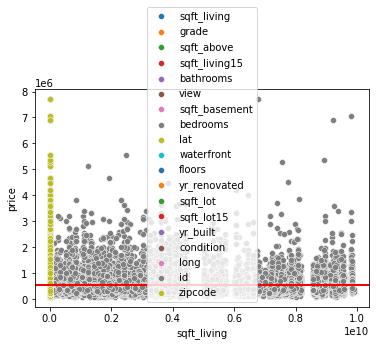

In [7]:
#그래프 확인

for sel_col_name in lst_corr_colname.index :
    sns.scatterplot( data= df[[sel_col_name , target_col_name]] , x= sel_col_name , y= target_col_name  , label=sel_col_name )
    plt.axhline(y = baseline_model, c = 'r')

## 특정 예측값 계산

In [ ]:
# 보간
interpolate_x = [[4000]]
interpolate_y = simple_ols.predict(interpolate_x)[0]

##### Simple Linear Regression ( 단순 선형회귀)
#### Multiple Linear Regression ( 다중 선형회귀)
#### Polynomial Linear Reregrssion (다항 선형회귀)

##### 공용 함수 정의

In [1]:
def 단순다중선형회귀 ( df , feature , target , fit = True , simple_ols=None) :

    X = df[feature]
    y = df[target]

    # 모델을 학습합니다.
    if fit :
      simple_ols = LinearRegression()
      simple_ols.fit(X, y)

    # 회귀 모델의 y 값 조회
    interpolate_y = simple_ols.predict(X)

    # 선형회귀 계수 값 확인
    # 회귀계수(coefficient) , ## 절편(intercept)
    print('coefficient : ', simple_ols.coef_  , 'Intercept : ', simple_ols.intercept_) 

    return simple_ols , interpolate_y

# 다항 선형회귀
def 다항선형회귀(df , feature , target , degree=2, fit = True , poly_ols = None,  **kwargs):

    X = df[feature]
    y = df[target]
  
    # 모델을 학습합니다.
    if fit :
      poly_ols = make_pipeline(PolynomialFeatures(degree), 
                              LinearRegression(**kwargs))
      poly_ols.fit(X, y)

     # 회귀 모델의 y 값 조회
    interpolate_y = poly_ols.predict(X)

     # 선형회귀 계수 값 확인
    # 회귀계수(coefficient) , ## 절편(intercept)
    #print('coefficient : ', poly_ols.coef_  , 'Intercept : ', poly_ols.intercept_) 

    return poly_ols , interpolate_y


# 평가지표 계산
def eval_models(y_pred, y_real) :
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    return mse, rmse, mae, r2

In [2]:
# 선형 회귀 모델 생성 

## 기준 모델
y_baseline = [y_baseline_model]*len(df)

# 단순 선형 회귀
feature = [ lst_corr_colname.index[0] ] # sqft_living
simple_ols , y_all_simple = 단순다중선형회귀 ( df , feature , target_col_name ) 

# 다중 선형회귀
feature = lst_corr_colname.index[:6]  # sqft_living , ....
multiple_ols , y_all_multiple = 단순다중선형회귀 ( df , feature , target_col_name ) 

# 다항 선형회귀 
poly_ols , y_all_poly = 다항선형회귀 ( df , feature , target_col_name , degree=2) 




# 평가 지표 계산
## 실제값
y_real = df[target_col_name]

comparison_metrics = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Simple', 'Multiple', 'Polynomial'])
comparison_metrics['Base'] = eval_models(y_baseline , y_real)
comparison_metrics['Simple'] = eval_models(y_all_simple, y_real)
comparison_metrics['Multiple'] = eval_models(y_all_multiple, y_real)
comparison_metrics['Polynomial'] = eval_models(y_all_poly, y_real)
comparison_metrics



NameError: name 'y_baseline_model' is not defined

In [3]:
# 내삽,외삽 ( 특정값 )
interpolate_x = [[df.iloc[0]['sqft_living']]] # [[1180]]
interpolate_y = simple_ols.predict(interpolate_x)[0]
print(f'{interpolate_x} 일때 예측값은 {int(round(interpolate_y))}입니다.')


NameError: name 'df' is not defined

## 단순, 다중 선형회귀

In [4]:
feature = [ 'bedrooms' , 'bathrooms' , 'sqft_living'   ]
target_col_name = 'price'

# 평가지표
comparison_metrics = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2']) #, columns=['Base','Simple', 'Multiple', 'Polynomial'])


# 학습
df = train_sk
multiple_ols , y_all_multiple_train = 단순다중선형회귀 ( df , feature , target_col_name , fit=True ) 
# 평가점수 저장
y_real = df[target_col_name]
comparison_metrics['Multiple_train'] = eval_models(y_all_multiple_train, y_real)


# 검증
df = val_sk
multiple_ols , y_all_multiple_val = 단순다중선형회귀 ( df , feature , target_col_name , fit=False , simple_ols= multiple_ols ) 
# 평가점수 저장
y_real = df[target_col_name]
comparison_metrics['Multiple_val'] = eval_models(y_all_multiple_val, y_real)


# 테스트 
df = test_sk
multiple_ols , y_all_multiple_test = 단순다중선형회귀 ( df , feature , target_col_name , fit=False , simple_ols= multiple_ols ) 
# 평가점수 저장
y_real = df[target_col_name]
comparison_metrics['Multiple_test'] = eval_models(y_all_multiple_test, y_real)


display( comparison_metrics )


print( round( comparison_metrics.loc['rmse']['Multiple_train'] - comparison_metrics.loc['rmse']['Multiple_val'] , 2 ) )



NameError: name 'pd' is not defined

## 다항선형회귀  & 최적 차수 구하기

In [ ]:
feature = [ 'bedrooms' , 'bathrooms' , 'sqft_living'   ]
target_col_name = 'price'

df = train_sk

# 평가지표
comparison_metrics = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2']) #, columns=['Base','Simple', 'Multiple', 'Polynomial'])

train_error = []
val_error = []
for degree in degrees :

  # 학습
  df = train_sk
  poly_ols , y_all_poly = 다항선형회귀(df , feature , target_col_name , degree=degree, fit=True ,poly_ols = None)
  y_real = df[target_col_name]
  mse, rmse, mae, r2 = eval_models(y_all_poly , y_real) 
  train_error.append(rmse)


  # 테스트
  df = val_sk
  poly_ols , y_all_poly = 다항선형회귀(df , feature , target_col_name , degree=degree, fit = False , poly_ols = poly_ols)
  y_real = df[target_col_name]
  mse, rmse, mae, r2 = eval_models(y_all_poly , y_real) 
  val_error.append(rmse)


print( f"최적 차수 = {np.argmin( val_error ) +1} ")

plt.plot(train_error, color='blue');
plt.plot(val_error, color='orange');
plt.xticks(range(len(degrees)), labels=degrees);


#### K fold

In [ ]:
feature = [ 'bedrooms' , 'bathrooms' , 'sqft_living'   ]
target_col_name = 'price'

df = train_sk

In [ ]:
# case 01 ( cross_val_score 사용)

simple_ols = LinearRegression()
model = simple_ols

# k-fold cross validation; 
k = 10
# scoring = 'neg_mean_absolute_error' # MAE
scring = 'neg_root_mean_squared_error' # RMSE
cv_results = cross_val_score( model, X = df[feature] , y = df[target_col_name] , cv=k, scoring=scring , n_jobs=-1 )

#print('mae for each fold : ', -np.round(cv_results, 2))
print('average for model : ', -np.mean(cv_results).round(2))
#print('std of result : ', np.std(cv_results).round(2))

In [ ]:
# case 02

from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

# 데이터를 몇개의 파트로 분할했는지 알 수 있습니다.
print('k =',kf.get_n_splits())

# split을 하면 데이터를 k번 k개로 분할합니다.
# 5번 학습을 진행하고 결과를 저장해 보겠습니다.

cv_result = []
for train_idx, test_idx in kf.split(X_train) :
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # 위에서 선언한 linear regression
    model.fit(X_train_cv, y_train_cv)

    # 모델 예측
    y_pred_cv = model.predict(X_val_cv)

    # mae를 구해보겠습니다.
    mae_cv = mean_absolute_error(y_val_cv, y_pred_cv).round(2)
    cv_result.append(mae_cv)

print('mae for each fold : ', cv_result)
print('average mae for model : ', np.mean(cv_result).round(2))
print('std of result : ', np.std(cv_result).round(2))

----

In [ ]:
# 수치형 변수만 스케일링을 해주도록 하겠습니다.

numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])



In [ ]:
# CV
val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)

----
# # 릿지 , 라소 회귀

# 가상데이터 만들기

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression

# 예시를 위해 가상 데이터를 만듭니다.
X, y = make_classification(n_samples=10000, n_features=10, random_state=42)
X = pd.DataFrame(data=X)

# y = 1,0 라벨값
# X = 속성 10 개의 무작위값 

In [ ]:
# 평가지표 계산
def eval_models(y_pred, y_real) :
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    return mse, rmse, mae, r2

# 테스트 데이터 분할 , 나누기

In [ ]:
# train, test, validation으로 데이터를 분할합니다.
df_y_clean = df_clean['cardio']
df_x_clean = df_clean.drop( columns=['cardio'] )


X_train_valid, X_test, y_train_valid, y_test = train_test_split( df_x_clean ,df_y_clean  , test_size=0.2, random_state=2 , stratify=y_real )
X_train, X_valid, y_train, y_valid  = train_test_split(X_train_valid, y_train_valid , test_size=0.2, random_state=2  , stratify=y_real )


# 각 데이터 세트의 shape을 확인해보겠습니다. 
print("train set : ",X_train.shape)
print("validation set : ",X_valid.shape)
print("test set : ",X_test.shape)

## 릿지 , 라소 회귀

In [ ]:
# Baseline 모델
baseline = df_y_clean.mean()
y_baseline = [baseline] * len(df_y_clean)

# 스케이일링 (원래는 ohe 전에 해주어야 한다.)
scaler = StandardScaler()

arr_train_sk_ohe_sca = scaler.fit_transform(df_train_sk_ohe)
arr_val_sk_ohe_sca = scaler.transform(df_val_sk_ohe)
arr_test_sk_ohe_sca = scaler.transform(df_test_sk_ohe)




## 전체 데이터셋을 넣고 특정 category 지정 후에 학습 가능
# (원래는 스테일링 이후에 해야 함 )
import category_encoders as ce
df = train_sk_x

df_target = train_sk_x
list_category_col_name = df_target.dtypes[df_target.dtypes.values == 'object'].index.tolist() 
list_category_col_name

ce_one_hot = ce.OneHotEncoder(cols=list_category_col_name , use_cat_names=True)
ce_one_hot.fit(X = df) #(TODO) 왜 fit. transform 과정이 필요할까??

df_train_sk_ohe = ce_one_hot.transform(train_sk_x)
df_val_sk_ohe = ce_one_hot.transform(val_sk_x)
df_test_sk_ohe = ce_one_hot.transform(test_sk_x)

print( len( df_train_sk_ohe.columns ) )



# ridge regression 구현
alpha = 1

ridge = Ridge(alpha=alpha ) #, normalize=True) # alpha : 패널티, normalize : 표준화 작업
ridge.fit( arr_train_sk_ohe_sca, train_sk_y )


# 회귀계수 절대값이 가장 작은 파라미터 구하기
파라미터절대값이가장작은피쳐의인덱스 = np.argmin( [ abs(x) for x in ridge.coef_] )
print ( np.round(ridge.coef_[파라미터절대값이가장작은피쳐의인덱스 ],2) , lst_columns_name[파라미터절대값이가장작은피쳐의인덱스] )

sorted( [ abs(x) for x in ridge.coef_] )[:5]




# lasso regression 구현
alpha = 1000
tol = 1

lasso = Lasso(alpha=alpha, tol=tol ) # normalize=True) # alpha : 패널티, normalize : 표준화 작업
lasso.fit( arr_train_sk_ohe_sca, train_sk_y )


# 회귀계수 0인 갯수 확인
회귀계수0갯수 = 0
for x in lasso.coef_ :
  if x == 0 :
    회귀계수0갯수 += 1

print( 회귀계수0갯수 )


# 성능지표
y_real = val_sk_y

# Baseline 모델
y_baseline = [baseline] * len(arr_val_sk_ohe_sca)

y_predict_ridge = ridge.predict( arr_val_sk_ohe_sca )
y_predict_lasso = lasso.predict( arr_val_sk_ohe_sca )

comparison_metrics = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'])
comparison_metrics['Base_val'] = eval_models(y_baseline , y_real)
comparison_metrics['ridge_val'] = eval_models(y_predict_ridge , y_real)
comparison_metrics['lasso_val'] = eval_models(y_predict_lasso , y_real)

comparison_metrics

#df_rslt = comparison_metrics.sort_values( by='mae' , axis=1)
df_rslt = comparison_metrics.loc[['mae']].sort_values( by='mae' , axis=1)
display( df_rslt )

round( df_rslt.iloc[0][0] , 2 ) , df_rslt.columns[0]

#### RidgeCV

In [ ]:
from sklearn.linear_model import RidgeCV

# 최적의 alpha 값 찾기
alphas = np.arange(1, 100, 10)
ridge_cv = RidgeCV( alphas=alphas, cv=5 )

y_real = train_sk_y
ridge_cv.fit(arr_train_sk_ohe_sca, y_real)

print( f"튜닝한 alpha { ridge_cv.alpha_ } " )


# 최적의 alpha 으로 성능지표 계산
y_predict_ridge_cv = ridge_cv.predict(arr_val_sk_ohe_sca)
y_real = val_sk_y
comparison_metrics['ridge_cv_val'] = eval_models(y_predict_ridge_cv , y_real)


# 최적의 alpha 으로 성능지표 계산
y_predict_ridge_cv = ridge_cv.predict(arr_test_sk_ohe_sca)
y_real = test_sk_y
comparison_metrics['ridge_cv_test'] = eval_models(y_predict_ridge_cv , y_real)


# 성능지표 확인
df_rslt = comparison_metrics.loc[['mae']].sort_values( by='mae' , axis=1)
display( df_rslt )

# 성능 향상 계산
a = df_rslt.loc['mae']['ridge_cv_test']
b = df_rslt.loc['mae']['ridge_test']

print ( f" {round((b-a)/b * 100 ,2 )} % 성능향상 있었음 " )


#### LassoCV

In [ ]:
from sklearn.linear_model import LassoCV

# 최적의 alpha 값 찾기
alphas = np.arange(1, 100, 10)
lasso_cv = LassoCV( alphas=alphas, cv=5 )

y_real = train_sk_y
lasso_cv.fit(arr_train_sk_ohe_sca, y_real)

print( f"튜닝한 alpha { lasso_cv.alpha_ } " )


# 최적의 alpha 으로 성능지표 계산
y_predict_ridge_cv = lasso_cv.predict(arr_val_sk_ohe_sca)
y_real = val_sk_y
comparison_metrics['lasso_cv_val'] = eval_models(y_predict_ridge_cv , y_real)


# 최적의 alpha 으로 성능지표 계산
y_predict_ridge_cv = lasso_cv.predict(arr_test_sk_ohe_sca)
y_real = test_sk_y
comparison_metrics['lasso_cv_test'] = eval_models(y_predict_ridge_cv , y_real)
comparison_metrics

#### ElasticNetCV

In [ ]:
# ElasticNet
# ElasticNetCV 도 있음  ElasticNet 사용할 필요 없어 보임 
from sklearn.linear_model import ElasticNetCV

alphas = np.arange(1, 100, 10)
elastic_cv = ElasticNetCV( alphas=alphas, cv=5 )

y_real = train_sk_y
elastic_cv.fit(arr_train_sk_ohe_sca, y_real)

print( f"튜닝한 alpha { elastic_cv.alpha_ } " )



# 최적의 alpha 으로 성능지표 계산
y_predict_ridge_cv = elastic_cv.predict(arr_val_sk_ohe_sca)
y_real = val_sk_y
comparison_metrics['elastic_cv_val'] = eval_models(y_predict_ridge_cv , y_real)


# 최적의 alpha 으로 성능지표 계산
y_predict_ridge_cv = elastic_cv.predict(arr_test_sk_ohe_sca)
y_real = test_sk_y
comparison_metrics['elastic_cv_test'] = eval_models(y_predict_ridge_cv , y_real)
comparison_metrics

### 

## 최적 성능 컬럼 찾기


In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

# (TODO) OneHotEncodeing을 한 이후에

# selector를 정의합니다. 
# 총 282개 특성 중 50개만 사용하도록 하겠습니다. 

selector = SelectKBest(score_func= f_regression, k=50)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train_ohe, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test_ohe)

# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

#(TODO) 선택된 피쳐가 Onedhotencoding된 피쳐라면... 원본 피쳐를 선택



#--------

# 다중선형회귀의 회귀계수 크기가 큰 상위 50개와 selectkbest로 선택된 50개를 비교해봤을 때 총 3개의 특성이 겹칩니다.
intersection_coef = set(ols_coef.head(50).index) & set(selector.get_feature_names_out())
print(len(intersection_coef))
print(intersection_coef)

# 타겟값과 상관계수가 가장 큰 50개의 컬럼과 비교했을 때는 36개가 겹칩니다. 
# 특성들과 타겟간의 상관관계룰 구하는 방법이 다르기 때문에 결과가 다르게 나옵니다.
tmp = pd.concat([X_train_ohe, y_train], axis=1).corr()['SalePrice'].sort_values(ascending=False)[1:51]
intersection_corr = set(tmp.index) & set(selector.get_feature_names_out())
print(len(intersection_corr))
print(intersection_corr)

---- 
# # 분류

## Logistic Regression (로지스틱 회귀)

In [ ]:
# 기준 모델
base_major = df_y_clean.mode()[0] # mode(): 최빈값
y_base = [base_major] * len(y_train)
y_real = y_train

accuracy = accuracy_score(y_real, y_base)
round( accuracy , 1)


# Scaling
lst_수치형컬럼 = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

scaler = StandardScaler()
X_train[lst_수치형컬럼] = scaler.fit_transform(X_train[lst_수치형컬럼])
X_valid[lst_수치형컬럼] = scaler.transform(X_valid[lst_수치형컬럼])
X_test[lst_수치형컬럼] = scaler.transform(X_test[lst_수치형컬럼])


# One hot encoding 
## 전체 데이터셋을 넣고 특정 category 지정 후에 학습 가능
# (스케일링 이후에 해야 함 )
list_category_col_name = ['gender']

ce_one_hot = ce.OneHotEncoder(cols=list_category_col_name , use_cat_names=True)

X_train_ohe = ce_one_hot.fit_transform(X_train)
X_valid_ohe = ce_one_hot.transform(X_valid)
X_test_ohe = ce_one_hot.transform(X_test)

print( len( X_train_ohe.columns ) )


# 로지스틱 회귀 - 학습
logistic = LogisticRegression( max_iter=1000 , class_weight='balanced')
logistic.fit(X_train_ohe, y_train)

### Accuracy (정확도)

# case 01
y_valid_pred = logistic.predict(X_valid_ohe)
round( accuracy_score(y_valid, y_valid_pred), 2 )

# case 02
round ( logistic.score( X = X_valid_ohe , y = y_valid) , 2 )



# Confusion Matrix

In [ ]:
# case 01

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(logistic, X_test_ohe, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_test)}', fontsize=15)
plt.show()

cm = pcm.confusion_matrix
print( cm ) 


TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

In [ ]:
# case 02
y_test_pred = logistic.predict(X_test_ohe)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

## 정확도, 정밀도, 재현율, F1 score

In [ ]:
# case 01

# rows = True label, cols = PredictedLabel
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

accuracy = (TP + TN) / cm.sum()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2*precision*recall/(precision+recall)

print(f'accuracy of logistic regression is {accuracy.round(2)}')
print(f'precision of logistic regression is {precision.round(2)}')
print(f'recall of logistic regression is {recall.round(2)}')
print(f'f1 of logistic regression is {f1.round(2)}')

In [ ]:
# case 02
#sklearn.metrics의 classification_report를 사용하여 정확도, 정밀도, 재현율, F1 score를 구할 수 있습니다.

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


y_test_pred = logistic.predict(X_test_ohe)
print(classification_report(y_test, y_test_pred))

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'accuracy of logistic regression is {accuracy.round(2)}')
print(f'precision of logistic regression is {precision.round(2)}')
print(f'recall of logistic regression is {recall.round(2)}')
print(f'f1 of logistic regression is {f1.round(2)}')

## 임계값 에 따른 TP....

In [ ]:
def 임계값에따른성능지표 (X_val_ohe ,y_val , threshold  ) :
  probability = logistic.predict_proba(X_val_ohe)[:,1]
  prediction = probability >= threshold
  true_label = y_val
  tmp = pd.DataFrame({'true label':true_label , 'prediction':prediction})
  con1 = tmp['true label'] == tmp['prediction'] # 정답을 맞추었는지 여부
  con2 = tmp['prediction'] == True  # 예측값이 True = positive 인지 여부

  TP = len(tmp[con1 & con2])
  FP = len(tmp[~con1 & con2])
  FN = len(tmp[~con1 & ~con2])
  TN = len(tmp[con1 & ~con2])

  neg, pos = tmp['prediction'].value_counts()
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)

  print(f'Threshold: {threshold}')
  print(f'# of 예측 Positive: {pos}')
  print(f'# of 예측 Negative: {neg}')
  print(f'FN: {FN}, FP: {FP}, TN: {TN}, TP: {TP} ')
  print(f'찐 N : {TN + FP}, 찐 P: {FN + TP}')
  print(f'recall: {round(recall,2)}, precision: {round(precision,2)}')

  print('--------------------')

thresholds = [0.3, 0.5, 0.8]
for threshold in thresholds :
  임계값에따른성능지표 (X_val_ohe ,y_val , threshold  ) 

# ROC & AUC , 임계값 최적화


## auc  : 
Positive 샘플의 확률이 Negative 샘플의 확률보다 클 확률 임

ROC curve를 이용하면 최적의 임계값을 찾을 수 있습니다.

TPR이 최대가 되고 FPR이 최소가 되는 지점이 최적의 임계값입니다.
TPR - FPR이 최대가 되는 지점을 찾으면 됩니다.

In [ ]:

from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)


# auc_score 계산
# 
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val, y_pred_proba)
print(f"Logistic Regression의 auc score : {auc.round(3)}")


# 최적의 임계값 
# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)


#최적 임계값의 적용 결과 
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))




#-----


# 시각화 
roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPR(Recall)': tpr, 
    'Threshold': thresholds
})


# ROC Curve
plt.plot(fpr, tpr, label='Logistic Regression')
x_base = np.arange(0, 1.0, 0.01)
y_base = np.arange(0, 1.0, 0.01)
plt.plot(x_base, y_base, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();







----
----

## 트리 베이스 모델

In [20]:
# 기준 모델
base = y_train.mode()[0]
baseline = len(y_train) * [base]


baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(2)} 입니다')

